#### Install scattertext

In [1]:
pip install scattertext

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 69.5 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9297 sha256=4533a52fcd42a27d8cd4a312bb1edf15357ac5a918b499e0d6f636129cdc3b9b
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext


### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import scattertext as st
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Read in the data

In [4]:
from os import name
df = pd.read_csv('/content/sentiment140.csv',encoding='latin-1', engine='python', on_bad_lines='skip', names=['popularity', 'tweet_id', 'tweet_date', 'query', 'user', 'text'])
df.head()

,popularity,tweet_id,tweet_date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
#check for nulls in text column
df['text'].isnull().sum()

0

In [8]:
#see how many rows are in the df
df.shape

(1600000, 6)

In [14]:
#Use only 1% of the total dataset so that the script does not take long to run
df = df.sample(frac=.01, random_state=3)
print(df['popularity'].value_counts())
print(df.shape)
df.head()

popularity
0    8012
4    7988
Name: count, dtype: int64
(16000, 6)


,popularity,tweet_id,tweet_date,query,user,text
223822,0,1977282312,Sat May 30 20:34:53 PDT 2009,NO_QUERY,LizzieyTish,@stargazingmommy why'd u delete me?
384273,0,2053379012,Sat Jun 06 04:20:31 PDT 2009,NO_QUERY,TNAaddicted,@Hypers_Starr but i've heard they will show ...
818620,4,1553144007,Sat Apr 18 13:29:21 PDT 2009,NO_QUERY,Athoob,Twouble with Twitters? http://twurl.nl/gmh47y
376580,0,2051705734,Fri Jun 05 22:36:26 PDT 2009,NO_QUERY,JudexJones,Seriously whereis it. I can fly a plane but I ...
797450,0,2328165414,Thu Jun 25 09:14:55 PDT 2009,NO_QUERY,kBoey,my left wrist hurts


In [15]:
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def clean_text(text):
  #remove all crazy stuff and lower the text
  text = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
  text = [ word.lemma_ for word in nlp(text) if word not in stop_words]

  text = ' '.join(text).strip().lower()
  return text

In [16]:
df['text_cleaned'] = df['text'].apply(clean_text)
df.head()

,popularity,tweet_id,tweet_date,query,user,text,text_cleaned
223822,0,1977282312,Sat May 30 20:34:53 PDT 2009,NO_QUERY,LizzieyTish,@stargazingmommy why'd u delete me?,why d u delete i
384273,0,2053379012,Sat Jun 06 04:20:31 PDT 2009,NO_QUERY,TNAaddicted,@Hypers_Starr but i've heard they will show ...,starr but i ve hear they will show epic on we tv
818620,4,1553144007,Sat Apr 18 13:29:21 PDT 2009,NO_QUERY,Athoob,Twouble with Twitters? http://twurl.nl/gmh47y,twouble with twitter
376580,0,2051705734,Fri Jun 05 22:36:26 PDT 2009,NO_QUERY,JudexJones,Seriously whereis it. I can fly a plane but I ...,seriously whereis it i can fly a plane but i c...
797450,0,2328165414,Thu Jun 25 09:14:55 PDT 2009,NO_QUERY,kBoey,my left wrist hurts,my left wrist hurt


### Check distribution of popularity

In [17]:
df['popularity'].value_counts(normalize=True)

,proportion
popularity,
0,0.50075
4,0.49925


### Visualize the distribution

<Axes: xlabel='popularity'>

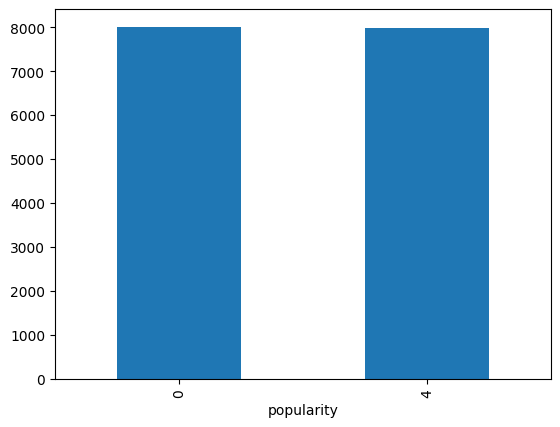

In [18]:
df['popularity'].value_counts().plot(kind='bar')

### Visualize the length of the tweet using a boxplot, histogram, and density plot

In [19]:
#add column with length of cleaned text
df['text_length'] = df['text_cleaned'].str.len()
df['text_length'].describe()

,text_length
count,16000.000000
mean,60.969625
std,33.491772
min,0.000000
25%,33.000000
50%,56.000000
75%,87.000000
max,155.000000


### Boxplot

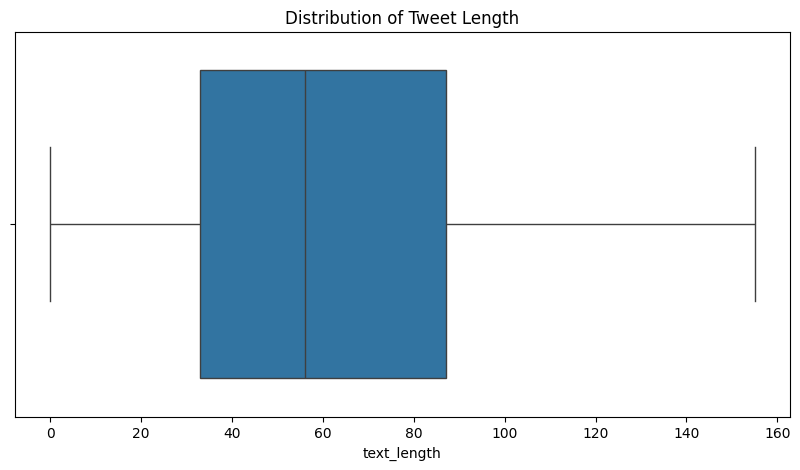

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='text_length', data=df)
plt.title('Distribution of Tweet Length')
plt.show()

### Histogram

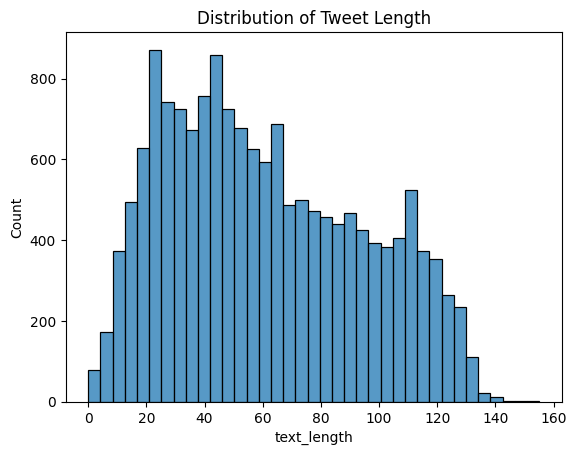

In [22]:
sns.histplot(df['text_length'])
plt.title('Distribution of Tweet Length')
plt.show()

### Density plot

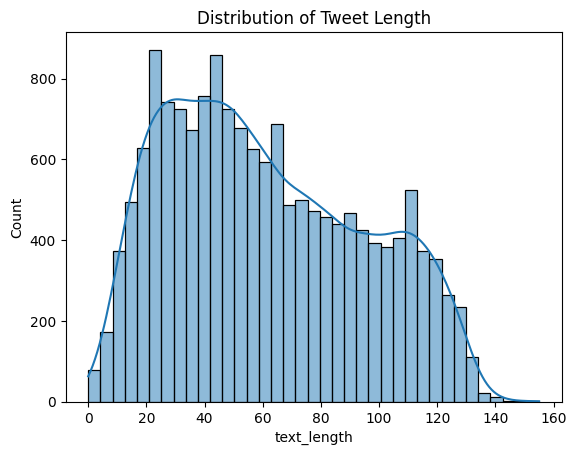

In [23]:
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Tweet Length')
plt.show()

### Visualize word count of text using boxplot, histogram, and density plot

In [26]:
# Get word count of cleaned text
df['word_count'] = df['text_cleaned'].str.split().str.len()
df['word_count'].describe()

,word_count
count,16000.00000
mean,13.26775
std,7.36173
min,0.00000
25%,7.00000
50%,12.00000
75%,19.00000
max,40.00000


### Box plot

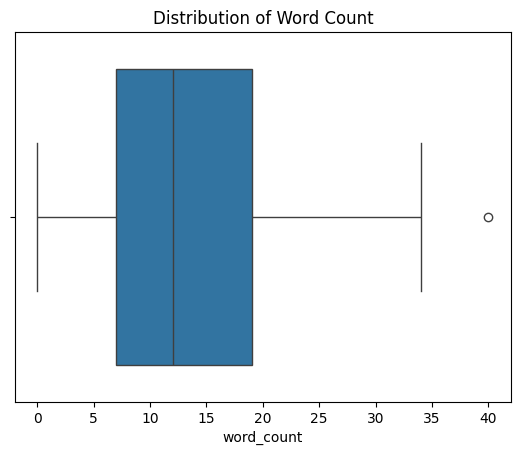

In [27]:
sns.boxplot(x='word_count', data=df)
plt.title('Distribution of Word Count')
plt.show()

### Histogram

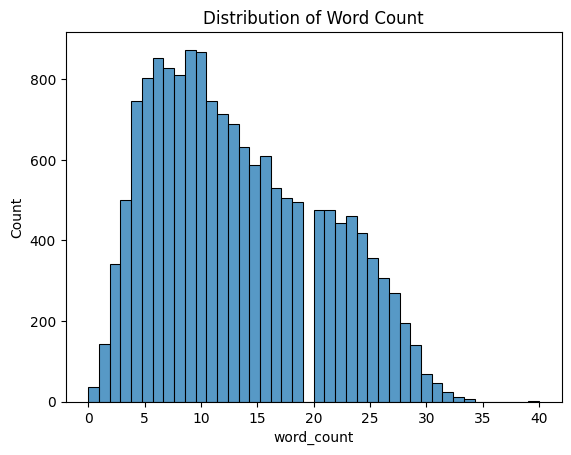

In [28]:
sns.histplot(df['word_count'])
plt.title('Distribution of Word Count')
plt.show()

### Density plot

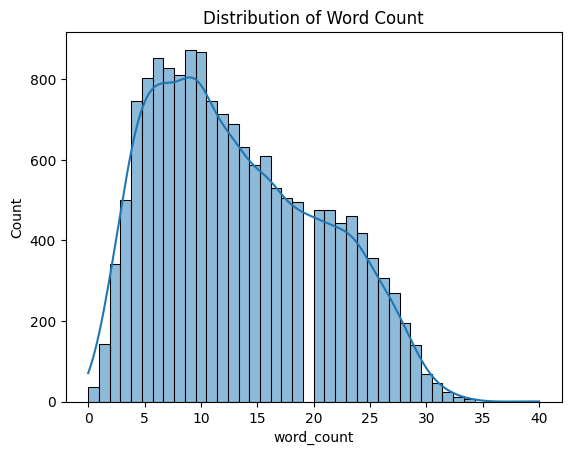

In [29]:
sns.histplot(df['word_count'], kde=True)
plt.title('Distribution of Word Count')
plt.show()

### Graphically summarize the top ten bigrams of the tf-idf of the text

In [39]:
#create a function to return the top bigrams similar to the function in the modules
def get_top_tf_idf_bigrams(df=df, col=df['text_cleaned'], use_idf=True, ngram_range=(2,2), top_n=10):
  tf_idf = TfidfVectorizer(stop_words='english', ngram_range=ngram_range, use_idf=use_idf)
  #fit and transform
  x_sparse_matrix = tf_idf.fit_transform(df[col])
  #get the feature names
  feature_names = np.array(tf_idf.get_feature_names_out())
  #generate the matrix
  tf_idf_sparse_matrix = tf_idf.transform(df[col])
  #rank the matrix by the tf-idf values and return the indices of the top_n values
  sorted_idx = np.argsort(tf_idf_sparse_matrix.data)[:-(top_n+1):-1]
  #return the feature names and tf-idf values in a df
  return pd.DataFrame(
      {
          'feature': feature_names[tf_idf_sparse_matrix.indices[sorted_idx]],
          'tfidf': tf_idf_sparse_matrix.data[sorted_idx]
      }
  )
df_text = get_top_tf_idf_bigrams(df, 'text_cleaned', top_n=10)
df_text

,feature,tfidf
0,poor ry,1.0
1,breakfast family,1.0
2,twouble twitter,1.0
3,thief fantastic,1.0
4,bovvere funny,1.0
5,3wordsaftersex lol,1.0
6,nope know,1.0
7,way home,1.0
8,wish know,1.0
9,twitter retard,1.0


### Plot the top ten bigrams

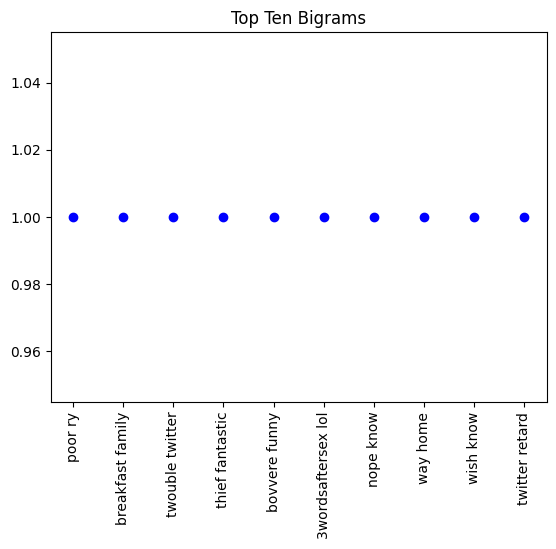

In [43]:
plt.plot(df_text['feature'], df_text['tfidf'], 'bo')
plt.xticks(rotation=90)
plt.title('Top Ten Bigrams')
plt.show()

### Generate scattertext corpus

In [44]:
corpus = st.CorpusFromPandas(
    df,
    category_col='popularity',
    text_col='text_cleaned',
    nlp=nlp
).build()

In [49]:
#create term frequence for popularity
term_freq = corpus.get_term_freq_df()
#positive score
term_freq['positive_score'] = corpus.get_scaled_f_scores('4')
#negative score
term_freq['negative_score'] = corpus.get_scaled_f_scores('0')

#order by '0' freq descending
term_freq_neg = term_freq.sort_values(by='0 freq', ascending=False)
term_freq_neg_score = term_freq.sort_values(by='negative_score', ascending=False)

### Visualize the top ten term frequency of the tokens associated with negative tweets

Index(['0 freq', '4 freq', 'positive_score', 'negative_score'], dtype='object')


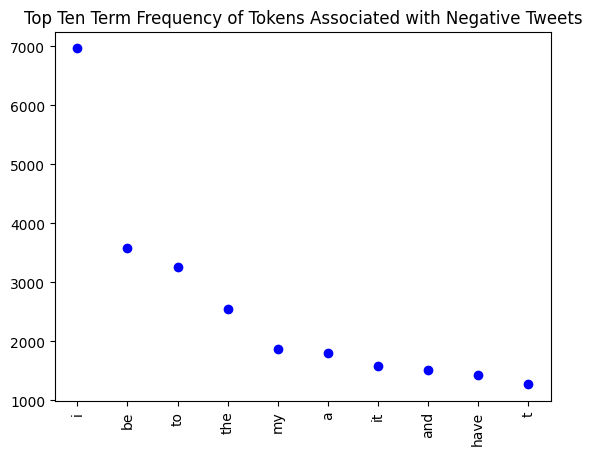

In [55]:
top_n = 10
term_freq_neg_top_ten = term_freq_neg.head(top_n)
print(term_freq_neg_top_ten.columns)
x = range(0, top_n)
plt.plot(x, term_freq_neg_top_ten['0 freq'], 'bo')
plt.xticks(x, term_freq_neg_top_ten.index, rotation=90)
plt.title('Top Ten Term Frequency of Tokens Associated with Negative Tweets')
plt.show()

### Visualize the top ten negative scores of the tokens using scattertext

Index(['0 freq', '4 freq', 'positive_score', 'negative_score'], dtype='object')


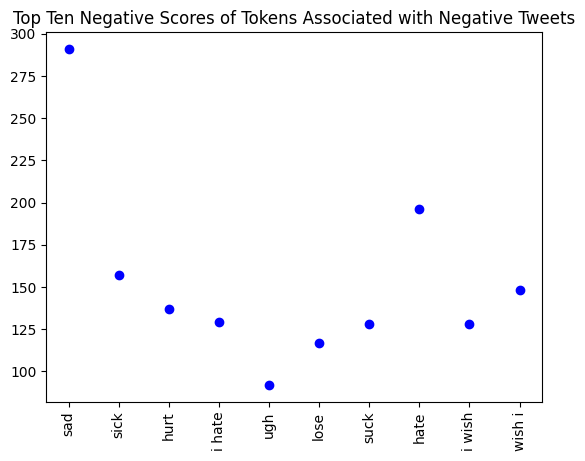

In [56]:
top_n = 10
term_freq_neg_score_top_ten = term_freq_neg_score.head(top_n)
print(term_freq_neg_score_top_ten.columns)
x = range(0, top_n)
plt.plot(x, term_freq_neg_score_top_ten['0 freq'], 'bo')
plt.xticks(x, term_freq_neg_score_top_ten.index, rotation=90)
plt.title('Top Ten Negative Scores of Tokens Associated with Negative Tweets')
plt.show()

### Visualize the first five sentances embedding for each tweet using PCA

In [58]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [68]:
nlp = spacy.load('en_core_web_lg')

data = []
df = df.reset_index(drop=True)
top_n = 5
for idx, row in df.iterrows():
  if idx < top_n:
    data.append([row['text_cleaned'], nlp(row['text_cleaned']).vector, row['popularity']])
  else:
    print(f'Reached row after {top_n}')
    break
df_sentance = pd.DataFrame(data, columns=['text', 'vector', 'popularity'])
df_sentance.head()

Reached row after 5


,text,vector,popularity
0,why d u delete i,"[0.565246, 1.797094, 0.88028014, -4.7135983, -...",0
1,starr but i ve hear they will show epic on we tv,"[1.1676348, 2.3232682, -5.209087, -2.8526793, ...",0
2,twouble with twitter,"[-1.3791332, -0.8664834, 0.25278667, 1.2694534...",4
3,seriously whereis it i can fly a plane but i c...,"[1.7243816, 3.3901403, -4.161571, -1.7742051, ...",0
4,my left wrist hurt,"[2.1382675, 3.582905, -3.2394152, -1.25072, 0....",0


In [69]:
X = np.array(list(df_sentance['vector']))
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

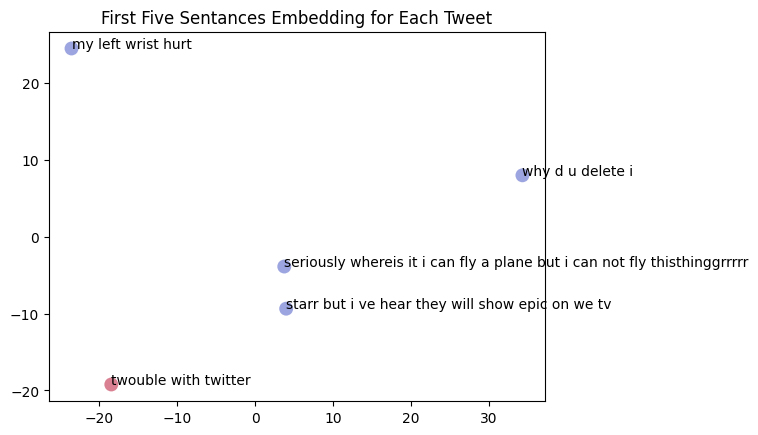

In [77]:
colors = {'0': 'red', '4': 'blue'}
text = df_sentance['text']
plt.scatter(pca_2d[:,0], pca_2d[:,1], s=100, c=df_sentance['popularity'], cmap='coolwarm', edgecolor='None', alpha=0.5)
plt.title('First Five Sentances Embedding for Each Tweet')
for idx, txt in enumerate(text):
  plt.annotate(txt, (pca_2d[idx,0], pca_2d[idx,1]))
plt.show()


### Visualize the first five sentances using t-SNE

In [80]:
tsne = TSNE(
    n_components=2,
    verbose=1,
    perplexity=4,
    n_iter=300,
)
tsne_2d = tsne.fit_transform(X)

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 5 samples in 0.000s...
[t-SNE] Computed neighbors for 5 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 5 / 5
[t-SNE] Mean sigma: 432.718978
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.851685
[t-SNE] KL divergence after 300 iterations: 0.128429


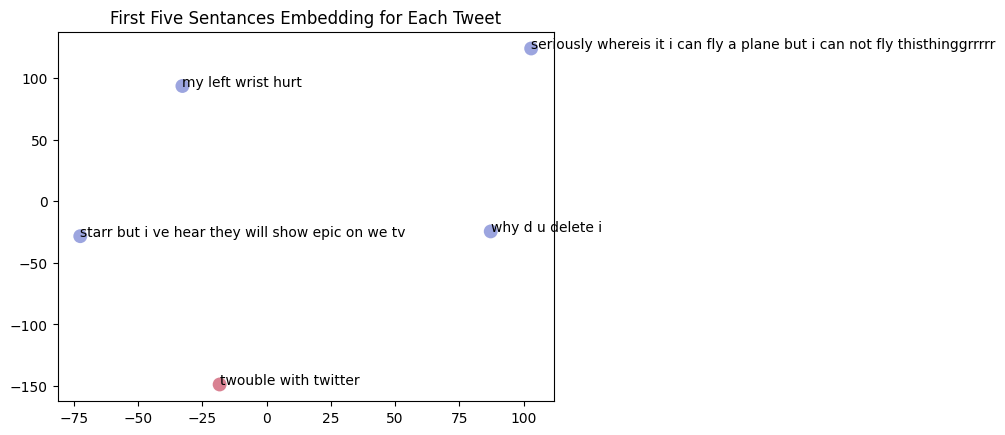

In [81]:
colors = {'0': 'red', '4': 'blue'}
text = df_sentance['text']
plt.scatter(tsne_2d[:,0], tsne_2d[:,1], s=100, c=df_sentance['popularity'], cmap='coolwarm', edgecolor='None', alpha=0.5)
plt.title('First Five Sentances Embedding for Each Tweet')
for idx, txt in enumerate(text):
  plt.annotate(txt, (tsne_2d[idx,0], tsne_2d[idx,1]))
plt.show()
